## 4. Transfer Learning

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

C:\Users\Teikkenn\AppData\Local\conda\conda\envs\ann\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11490809329124390494
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1472836403
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16690115100134545388
physical_device_desc: "device: 0, name: GeForce GTX 950, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8139461033845107992
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1472836403
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13148874380317180008
physical_device_desc: "device: 0, name: GeForce GTX 950, pci bus id: 0000:01:00.0, compute capability: 5.2"
]


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
from keras.datasets import cifar100
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
y_train = to_categorical(y_train, num_classes = 100)
y_test = to_categorical(y_test, num_classes = 100)
x_train = x_train/255.0
x_test = x_test/255.0

> a) Entrene una red neuronal convolucional como se presenta en el código a continuación durante 15 *epochs*, realizando un gráfico de evolución de la función de pérdida y de la exactitud del algoritmo (*accuracy*) sobre ambos conjuntos, entrenamiento y pruebas. Comente sobre el tiempo de ejecución de este entrenamiento. Reporte el *accuracy* del modelo final sobre el conjunto de pruebas.

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD
import time

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = "softmax"))
model.compile(optimizer=SGD(lr=0.01, momentum = 0.9), loss='categorical_crossentropy',metrics=['accuracy'])
start_time = time.time()
hist = model.fit(x_train,y_train,epochs=15,batch_size=128,validation_data=(x_test,y_test),verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))
model.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 16s 312us/step - loss: 4.3058 - acc: 0.0497 - val_loss: 3.8976 - val_acc: 0.1173
Epoch 2/15
50000/50000 [==============================] - 14s 284us/step - loss: 3.7916 - acc: 0.1206 - val_loss: 3.5389 - val_acc: 0.1757
Epoch 3/15
50000/50000 [==============================] - 14s 283us/step - loss: 3.4610 - acc: 0.1801 - val_loss: 3.2084 - val_acc: 0.2311
Epoch 4/15
50000/50000 [==============================] - 14s 289us/step - loss: 3.1320 - acc: 0.2406 - val_loss: 2.9227 - val_acc: 0.2951
Epoch 5/15
50000/50000 [==============================] - 13s 267us/step - loss: 2.8570 - acc: 0.2940 - val_loss: 2.7196 - val_acc: 0.3280
Epoch 6/15
50000/50000 [==============================] - 13s 268us/step - loss: 2.6212 - acc: 0.3388 - val_loss: 2.6093 - val_acc: 0.3495
Epoch 7/15
50000/50000 [==============================] - 13s 267us/step - loss: 2.3969 - acc: 0.3850 - val_loss: 2.

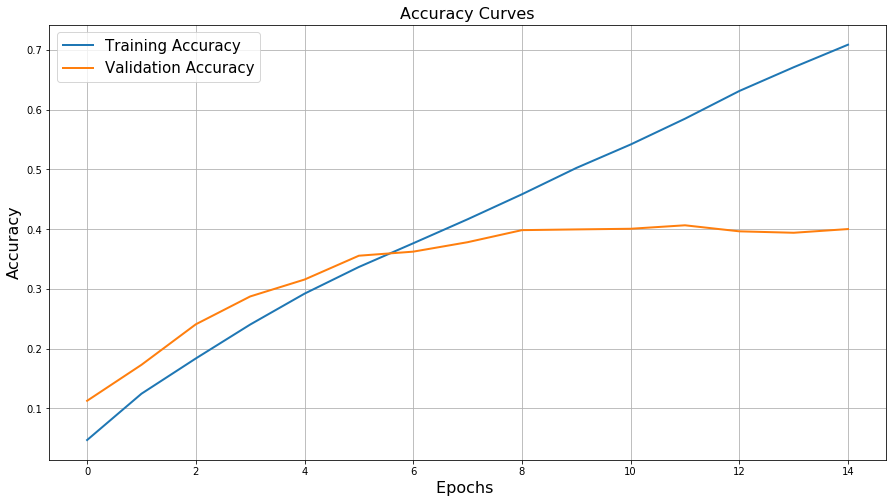

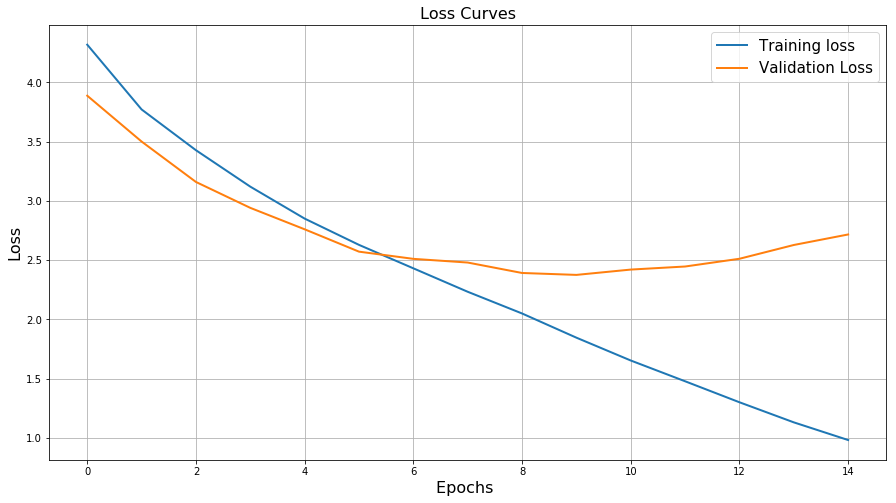

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

Como podemos ver, la curva de accuracy y de la función de perdida del conjunto de entrenamiento llega a aproximadamente un 70% y un 1.0 de perdida respectivamente mientras que para el conjunto de validación (En este caso el conjunto de validación es el conjunto de prueba, esto se realiza solo con fines académicos ya que en la realidad se debería tener un conjunto de validación) no se logro llegar a estos valores, esto es un caso típico de overfitting o sobreajuste de una red neuronal o de cualquier sistema de aprendizaje automatico.

El overfitting es la tendencia de la red a desempeñarse muy bien con los datos de entrenamiento pero mal o diferente a nuevos datos o datos de prueba, lo cual se ve reflejado en los gráficos de Loss y Accuracy.

Para combatir esto, se tienen que introducir regularizadores los cuales, como indica su nombre, regulan la red neuronal para no llegar al overfitting, esto se realizara en la siguiente actividad con un método llamado dropout.

Finalmente, el tiempo de ejecución fue de aproximadamente 5 minutos, lo cual es bastante normal para una red pequeña como esta en GPU.

> b) Debido al comportamiento de las curvas de entrenamiento, claramente se ve que se necesita un regularizador. Experimente utilizando Dropout con una tasa de 0.25 en las tandas convolucionales, elija donde situarlo, luego de la primera convolución, después de la segunda, solamente después del *pooling*, en todas o alguna forma que le parezca conveniente, de argumentos de ello. La idea es que se forme una idea de dónde conviene colocar el regularizador y porqué.

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD
import time

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation = "softmax"))
model.compile(optimizer=SGD(lr=0.01, momentum = 0.9), loss='categorical_crossentropy',metrics=['accuracy'])
start_time = time.time()
hist = model.fit(x_train,y_train,epochs=15,batch_size=128,validation_data=(x_test,y_test),verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))
model.summary()

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 17s 342us/step - loss: 4.3235 - acc: 0.0468 - val_loss: 3.9352 - val_acc: 0.1053
Epoch 2/15
50000/50000 [==============================] - 15s 301us/step - loss: 3.7817 - acc: 0.1227 - val_loss: 3.5401 - val_acc: 0.1675
Epoch 3/15
50000/50000 [==============================] - 15s 290us/step - loss: 3.4596 - acc: 0.1792 - val_loss: 3.2907 - val_acc: 0.2141
Epoch 4/15
50000/50000 [==============================] - 14s 289us/step - loss: 3.1673 - acc: 0.2308 - val_loss: 2.9753 - val_acc: 0.2718
Epoch 5/15
50000/50000 [==============================] - 14s 284us/step - loss: 2.9096 - acc: 0.2796 - val_loss: 2.8132 - val_acc: 0.3084
Epoch 6/15
50000/50000 [==============================] - 14s 284us/step - loss: 2.7015 - acc: 0.3218 - val_loss: 2.6284 - val_acc: 0.3396
Epoch 7/15
50000/50000 [==============================] - 15s 308us/step - loss: 2.4960 - acc: 0.3664 - val_loss: 2.

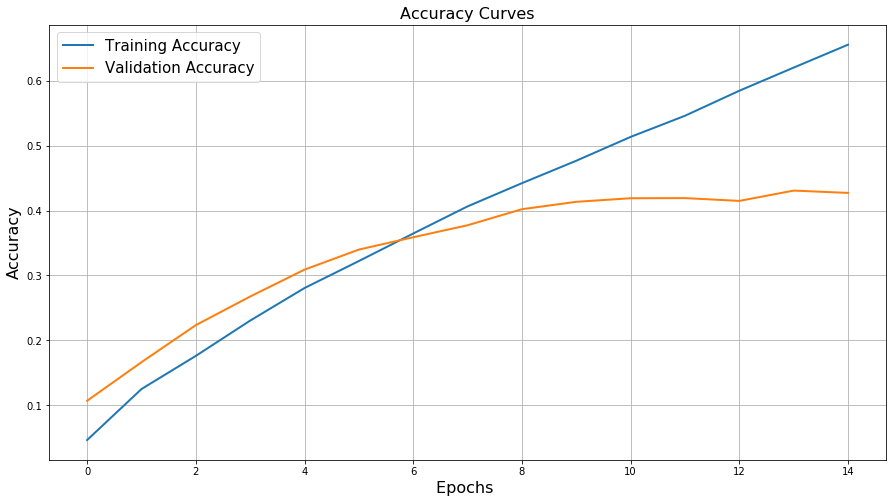

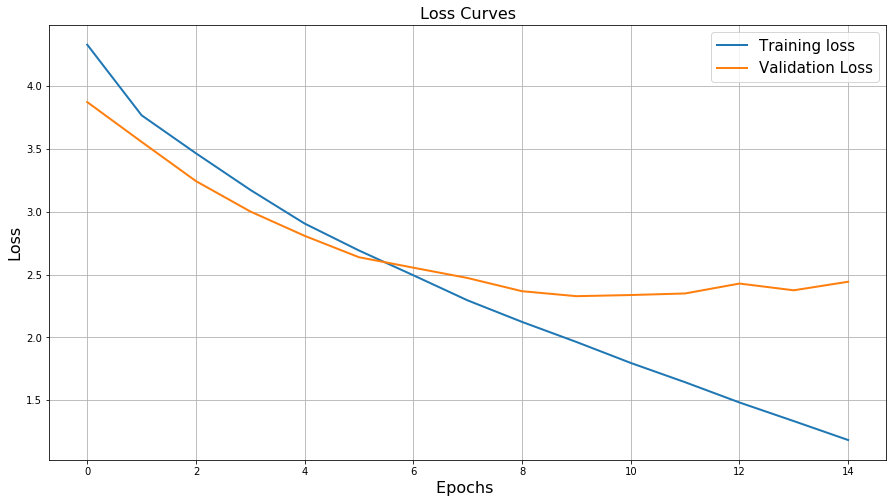

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

En esta actividad, se disminuir el overfitting de la red con un método de regularización dropout, el cual tiene por función desactivar un porcentaje de las neuronas en cierta capa, por lo cual, estas neuronas no transmiten información a la capa siguiente.

La elección de donde colocar el droput es un tema de estudio,  nosotros nos guiamos con este [Paper](https://arxiv.org/ftp/arxiv/papers/1512/1512.00242.pdf) el cual indica que el mejor resultado para un red compleja para el dataset Cifar100 es que los dropout se coloquen despues de la capa de pooling, lo cual obtuvo resultados bastante buenos generando una red donde el accuracy llegaba alrededor de 2% de mejora, lo cual es bastante si consideramos la parte a) de la actividad como el "estado del arte". Posteriormente se fue probado y finalmente se logro llegar a un 43% de accuracy con el set de validación al usar un droput en la penúltima capa.

Finalmente, el tiempo de ejecución fue el doble que la sección a) por lo cual, el droput genera una carga adicional para la GPU, por lo cual entre mas dropout se tenga, mas lento sera la ejecución lo cual es contraintuitivo, por que uno cree que al apagarse neuronas, se tarde menos la red en entrenar.

> c) Como pre entrenamiento de la misma red definida en a) de una manera no supervisada se trabajará con un autoencoder convolucional, el cual no necesita etiqueta de los datos por lo que se puede aprovechar de transferir lo aprendido con datos sin conocer si pertenecen a la misma categoría o no. Comente y analice si esto mejora lo visto en a). *Utilice todas las imágenes no etiquetadas que desee*.

In [49]:
from keras.layers import Input
from keras.models import Model,Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Dense, Flatten, Dropout
from keras.optimizers import SGD

###BUILD AUTOENCODER1
hidden_layer1 = 9
hidden_layer2 = 12


input_img = Input(shape=x_train.shape[1:])
encoded1 = Conv2D(hidden_layer1, (3, 3),activation='relu',padding='same')(input_img)
decoded1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(encoded1)
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
autoencoder1.summary()
hist_autoencoder1 = autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')
###BUILD AUTOENCODER2
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(hidden_layer2,(3, 3), activation='relu', padding='same')(encoded1) 
decoded2 = Conv2D(hidden_layer1,(3, 3), activation='sigmoid',padding='same')(encoded2) 
#finish AUTOENCODER2
decoded1 = autoencoder1.layers[-1](decoded2)
autoencoder2 = Model(autoencoder1.input, decoded1) #all model
#autoencoder1 set fixed
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False
autoencoder2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
autoencoder2.summary()
hist_autoencoder2 = autoencoder2.fit(x_train, x_train, epochs=15, batch_size=128,validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#FINE TUNNING
model = Sequential()
model.add(Conv2D(hidden_layer1,(3, 3),padding='same',activation='relu',input_shape=x_train.shape[1:]))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(hidden_layer2, (3, 3),padding='same',activation='relu'))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='sigmoid'))
model.add(Dense(100,activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01,momentum=0.9), metrics=['accuracy'])
hist_modelC = model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 9)         252       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 3)         246       
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 9s 177us/step - loss: 1.5496 - acc: 0.7313 - val_loss: 1.5456 - val_acc: 0.8103
Epoch 2/15
50000/50000 [==============================] - 7s 148us/step - loss: 1.5416 - acc: 0.8288 - val_loss: 1.5446 - val_acc: 0.8414
Epoch 3/15
50000/50000 [==============================] - 8s 152us/step - loss: 1.

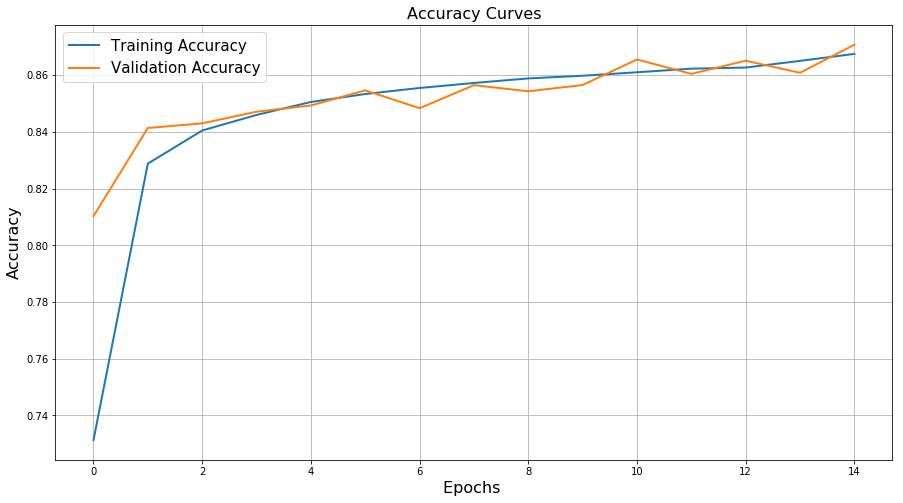

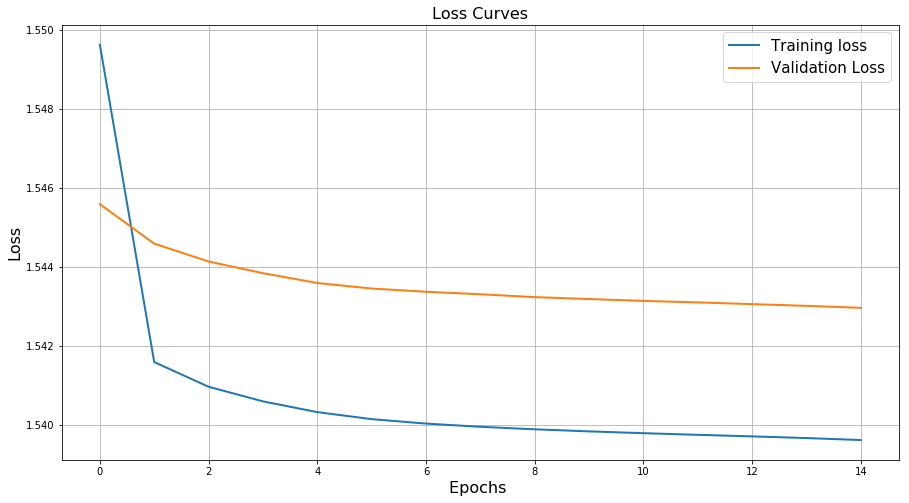

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_autoencoder1.history['acc'],linewidth=2.0)
plt.plot(hist_autoencoder1.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_autoencoder1.history['loss'],linewidth=2.0)
plt.plot(hist_autoencoder1.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

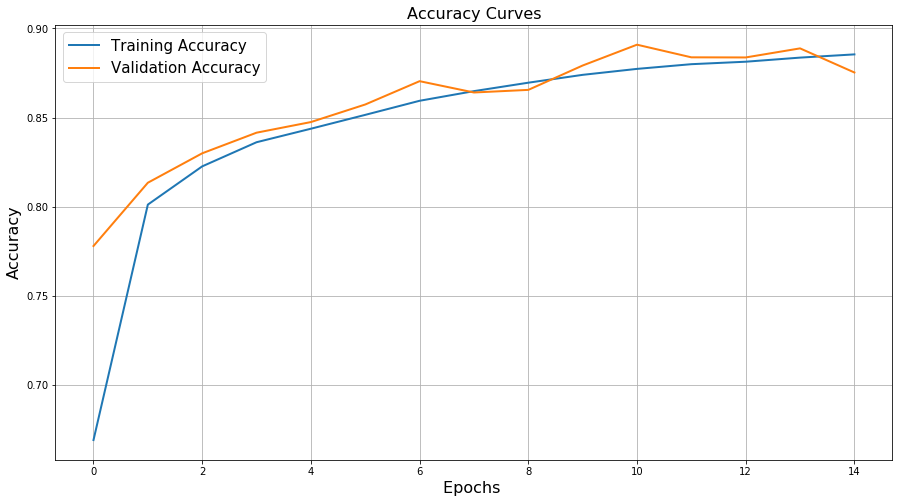

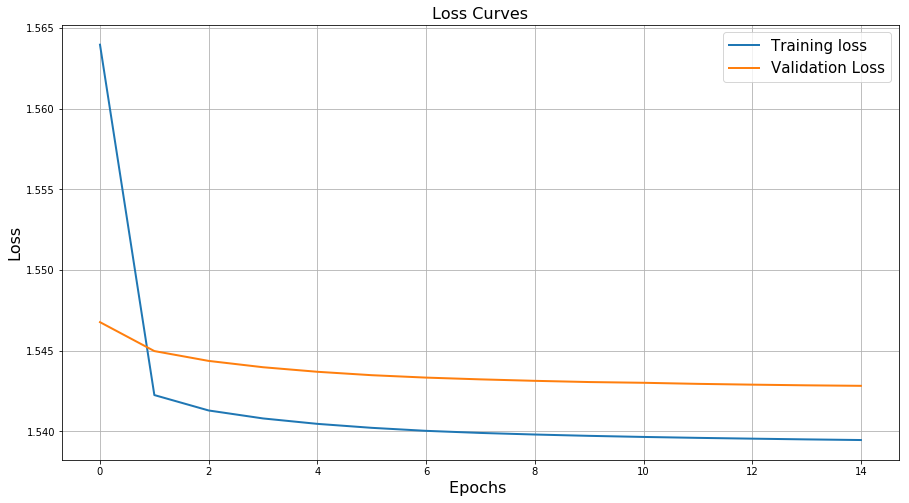

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_autoencoder2.history['acc'],linewidth=2.0)
plt.plot(hist_autoencoder2.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_autoencoder2.history['loss'],linewidth=2.0)
plt.plot(hist_autoencoder2.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

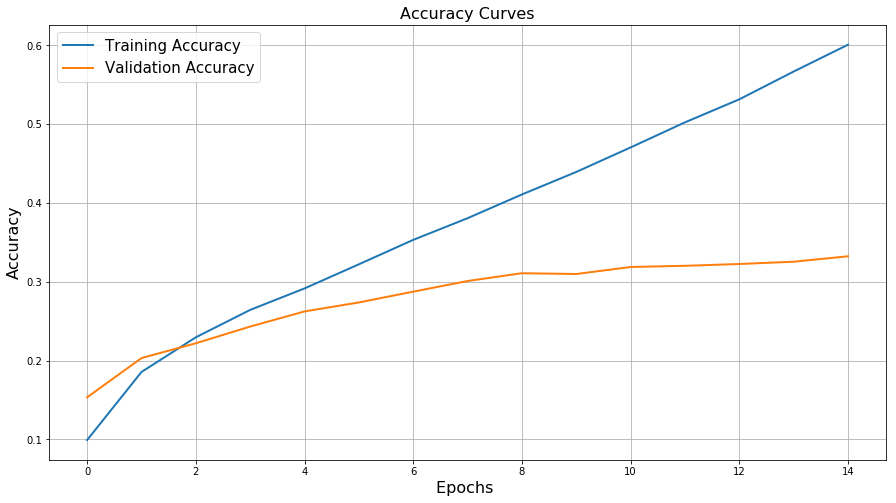

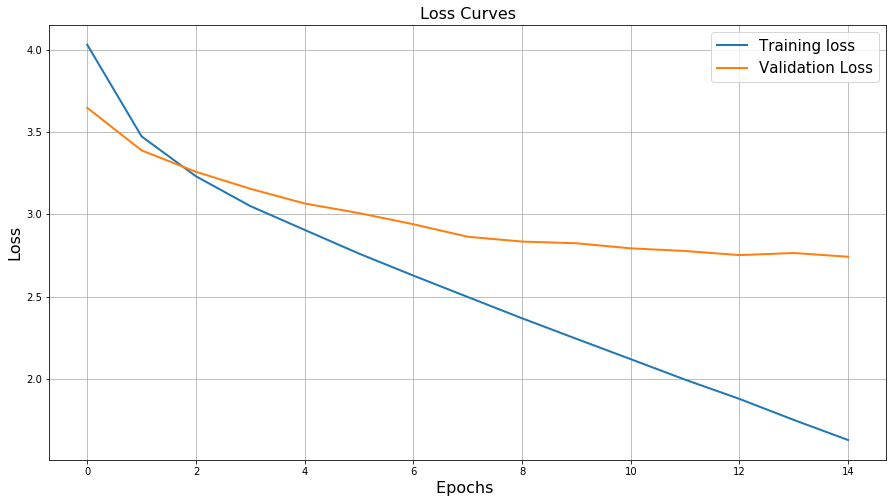

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_modelC.history['acc'],linewidth=2.0)
plt.plot(hist_modelC.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist_modelC.history['loss'],linewidth=2.0)
plt.plot(hist_modelC.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

En este sección, se diseño 2 autoencoders, los cuales asignaron etiquetas automáticamente a las clases. Posteriormente, se uso el entrenamiento previo de estas para afinar los pesos iniciales del la red neuronal final.

En un principio, los resultados eran esperanzadores ya que el primero autoencoder alcanzo un accuracy del 90% y el segundo autoencoder alcanzo un accuracy casi del 90% también, pero al usar estos pesos para la ultima red, se descubrió que la red apenas pudo llegar a accuracys similares a la de la red en la sección a, es mas, solo se pudo llegar a resultados similares al modificar un poco la ultima red, es decir, la red de la parte a, el cambio fue que la ultima función de activación se paso a una sigmoid en vez de una relu (ya que con relu daba resultados peores) y se elimino el dropout del 0.5.

Por lo tanto, llegamos a la conclusión que este método no es la mejor idea para ajustar pesos en una red tan sencilla, sale mejor usar simplemente técnicas de regularización que mejorar el accuracy y no incrementan el tiempo de computo tanto como la técnica que acabamos de utilizar.

> d) Otra forma de hacer lo que se conoce como *transfer learning* es utilizar el conocimiento (los parámetros) aprendido por una red entrenada con millones de imágenes, y tomar estos parámetros como los pre entrenados. Para esto se utilizará el modelo VGG16 [7] proporcionado a través de la interfaz de keras. Visualice el modelo y sus 23 capas. Para esta instancia se utilizará todo lo aprendido por las capas convolucionales, es decir, se eliminan las capas densas del modelo y se agregan unas nuevas a ser entrenadas desde cero.

In [55]:
from keras.applications import VGG16
from keras.datasets import cifar100
from keras import utils as np_utils
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

La arquitectura VGG16 fue presentada por Simonyan y Zisserman en su paper del 2014 [Very Deep Convolutional Networks for Large Scale Image Recognition](https://arxiv.org/abs/1409.1556) donde exponen una red neural profunda de 16 capas(en el 2014 se consideraba profundo ya 16 capas) donde se caracteriza que solo se ocupan capas convolucionales 3x3 juntas una sobre la otra mientras se va reducidiendo el volumen por capas de maxpooling.

<img src="ImgVgg165.png" alt="Drawing" style="width: 5000px;"/>
<img src="capas.png" alt="Drawing" style="width: 5000px;"/>

Para entrenar estas grandes redes, primero entrenaron modelos en miniatura de este tipo de redes, lo cual sirve como pre entrenamiento para la red grande lo cual era tedioso en el 2014 pero con el incremento de nucleos de las GPU, esto fue reducido considerablemente.



> e) Entrene esta red agregando una capa densa de 1024 neuronas seguido de un dropout de 0.5, finalmente es necesario agregar la capa de clasificación para las 100 clases. Utilice la misma configuración del optimizador para que las comparaciones sean válidas. Entrene unicamente por 10 *epochs* ¿Qué sucede? Comente.

In [63]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = "softmax"))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(features_train, y_train,epochs=10, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 76us/step - loss: 3.4107 - acc: 0.1958 - val_loss: 2.8956 - val_acc: 0.2941
Epoch 2/10
50000/50000 [==============================] - 3s 57us/step - loss: 2.8972 - acc: 0.2804 - val_loss: 2.7235 - val_acc: 0.3194
Epoch 3/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.7385 - acc: 0.3104 - val_loss: 2.6515 - val_acc: 0.3361
Epoch 4/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.6294 - acc: 0.3332 - val_loss: 2.5999 - val_acc: 0.3415
Epoch 5/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.5483 - acc: 0.3485 - val_loss: 2.5542 - val_acc: 0.3499
Epoch 6/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.4831 - acc: 0.3601 - val_loss: 2.5215 - val_acc: 0.3636
Epoch 7/10
50000/50000 [==============================] - 3s 57us/step - loss: 2.4248 - acc: 0.3735 - val_loss: 2.4972 - val_acc

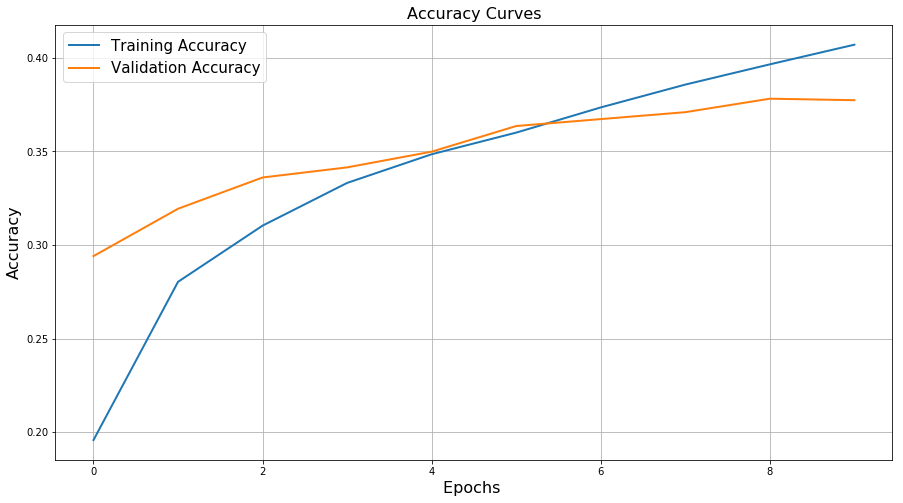

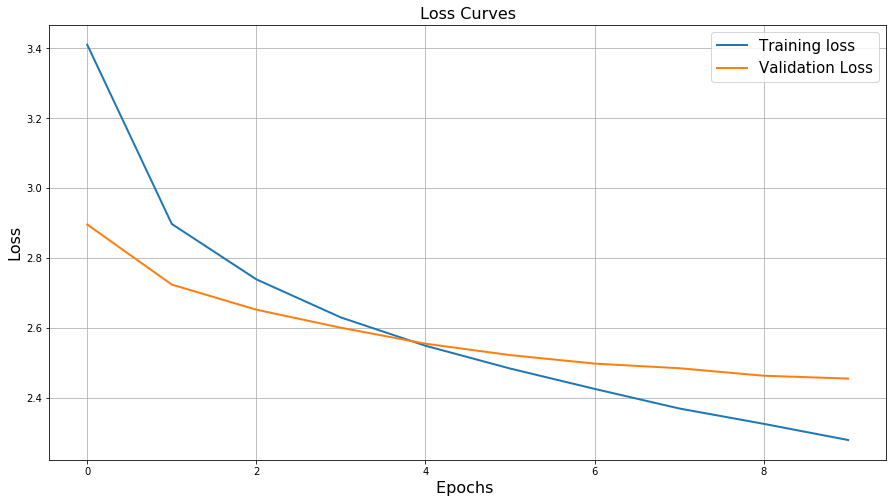

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 72us/step - loss: 3.9498 - acc: 0.1124 - val_loss: 3.3893 - val_acc: 0.2144
Epoch 2/10
50000/50000 [==============================] - 3s 50us/step - loss: 3.3449 - acc: 0.1994 - val_loss: 3.1141 - val_acc: 0.2506
Epoch 3/10
50000/50000 [==============================] - 2s 49us/step - loss: 3.1511 - acc: 0.2327 - val_loss: 2.9782 - val_acc: 0.2739
Epoch 4/10
50000/50000 [==============================] - 3s 50us/step - loss: 3.0396 - acc: 0.2537 - val_loss: 2.9038 - val_acc: 0.2879
Epoch 5/10
50000/50000 [==============================] - 3s 50us/step - loss: 2.9592 - acc: 0.2699 - val_loss: 2.8404 - val_acc: 0.3059
Epoch 6/10
50000/50000 [==============================] - 2s 50us/step - loss: 2.9021 - acc: 0.2794 - val_loss: 2.8029 - val_acc: 0.3076
Epoch 7/10
50000/50000 [==============================] - 2s 50us/step - loss: 2.8547 - acc: 0.2882 - val_loss: 2.7610 - val_acc

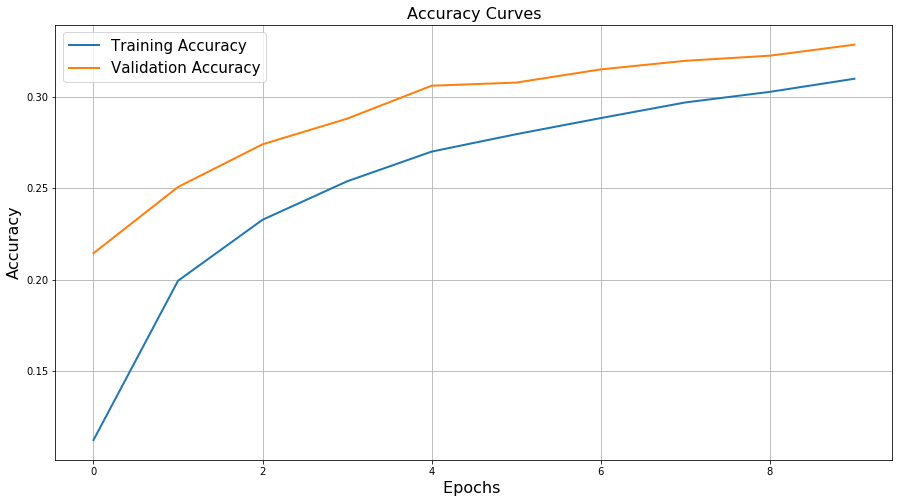

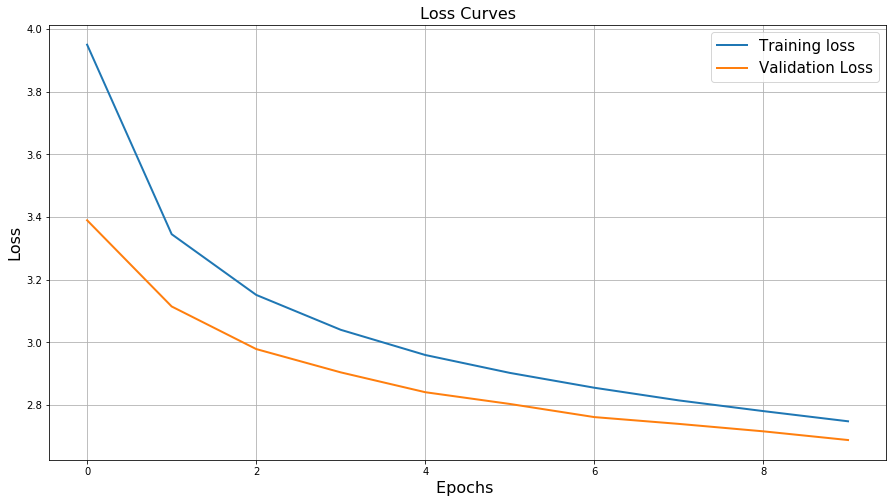

In [71]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = "softmax"))
model.compile(optimizer=SGD(lr=0.01,momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(features_train, y_train,epochs=10, batch_size=128,verbose=1,validation_data=(features_test,y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

Para esta actividad, no se logro superar el 40% de accuracy obtenido al principio de la tarea, solo se llego a un 30% lo cual es muy desalentador, lo bueno, es que este método genera mucho menos overfitting que el método con una red convolución normal o con dropout, por lo cual si lo que nos interesa es minimizar el overfitting esta seria una buena aproximación.

También se intento modificar el optimizador, utilizando adam, se logro llegar a mejores resultados pero con un claro aumento en el overfitting que utilizando solo SGD, pero por otro lado, el everfitting es mucho menor que en las primeras secciones, haciéndolo un buen candidato si se quiere balancear overfitting y mejorar el accuracy.

En cuanto a la cantidad de epoach, se incremento el numero de epoach para ver como cambia el accuracy y se logro llegar a mejores resultados, pero incremental el overfitting a costo de incrementar el accuracy.

> f) Agregue una capa de normalización (*Batch Normalization* [8]) de las activaciones en las capas densas, esto es, restar por la media del batch y dividir por la desviación estándar. Vuelva a entrenar el modelo con la misma configuración pero ahora por **15 *epochs***. Comente lo observado y compare las curvas de convergencia con los modelos anteriores ¿Por qué esto mejora a lo presentado en e)? Realice los mismos gráficos que en a) a través del número de *epochs* y comente sobre el tiempo de ejecución de este entrenamiento.

In [74]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = "softmax"))
model.compile(optimizer=SGD(lr=0.01,momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(features_train, y_train,epochs=15, batch_size=128,verbose=1,validation_data=(features_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 83us/step - loss: 3.5140 - acc: 0.1918 - val_loss: 2.8661 - val_acc: 0.2985
Epoch 2/15
50000/50000 [==============================] - 3s 55us/step - loss: 2.8937 - acc: 0.2866 - val_loss: 2.6899 - val_acc: 0.3282
Epoch 3/15
50000/50000 [==============================] - 3s 54us/step - loss: 2.6870 - acc: 0.3259 - val_loss: 2.6136 - val_acc: 0.3440
Epoch 4/15
50000/50000 [==============================] - 3s 56us/step - loss: 2.5590 - acc: 0.3499 - val_loss: 2.5604 - val_acc: 0.3592
Epoch 5/15
50000/50000 [==============================] - 3s 54us/step - loss: 2.4709 - acc: 0.3663 - val_loss: 2.5362 - val_acc: 0.3615
Epoch 6/15
50000/50000 [==============================] - 3s 56us/step - loss: 2.3902 - acc: 0.3804 - val_loss: 2.5026 - val_acc: 0.3708
Epoch 7/15
50000/50000 [==============================] - 3s 55us/step - loss: 2.3213 - acc: 0.3952 - val_loss: 2.4902 - val_acc

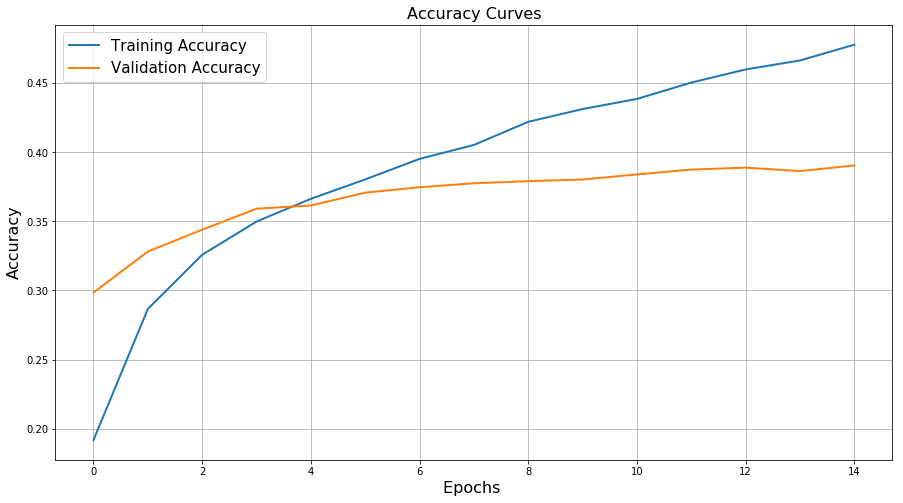

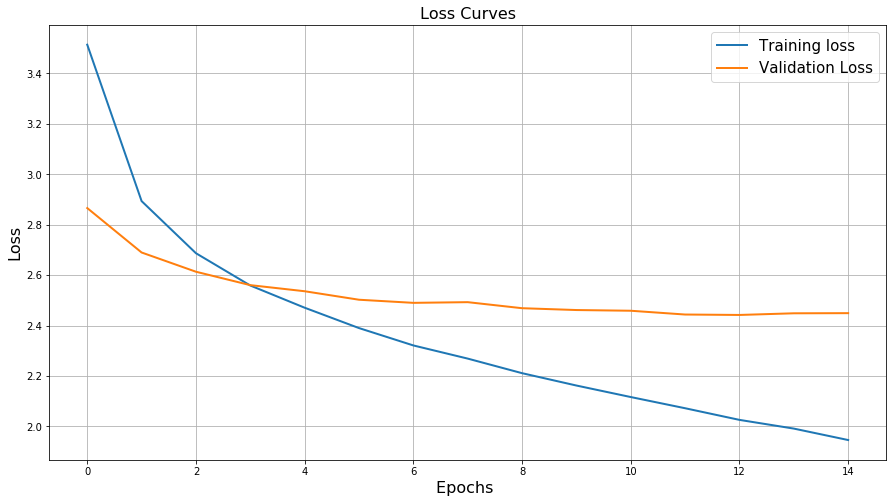

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

Según la API de keras, la capa de normalización normaliza las activaciones de la capa previa en cada epoach, es decir, aplica una transformación que mantenga la activación media cercana a 0 y la desviación estándar de activación cercana a 1. Esta capa tiene un efecto similar a los mini batches pero tiene un impacto mayor al reducir el internal covariate shift que en palabras muy simples es un efecto que ocurre a medida que los datos van cambiando a través del paso de la red neuronal y esta capa suaviza ese cambio. Esto permite que la red interprete mejor los datos en cada epoach sin distorsionar tanto la información.

Esta estructura aumento considerablemente el accuracy en traning y en validación y solamente con 15 epoach, se probo con mas epoach pero el accuracy de prueba se estanca pasado los 20 epoach, por lo cual no es mucha diferencia.

Los tiempos de ejecución para este estructura son bastante buenos, tomando menos de 3 minutos la ejecución con 15 apoach y menos de 10 minutos una con 150 epoach lo cual prueba que esta estructura es súper útil si se desea darle importancia al tiempo de entrenamiento sobre un accuracy perfecto.

> g) Anteriormente se dejaron fijas las capas de convolución de VGG16, ahora experimente comentando sobre la convergencia y el tiempo de ejecución el entrenar la última tanda de convoluciones de VGG16, es decir, tome como punto inicial los pesos pre entrenados de esta red en *Imagenet* y entrenelos para este problema.

In [20]:
from keras.models import Model,Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Dense, Flatten, Dropout,BatchNormalization, Input
from keras.optimizers import SGD
from keras.applications import VGG16
from keras import utils as np_utils
import numpy as np
import time

#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
salida_vgg = modelVGG.get_layer('block4_pool').output_shape
model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    
##dense section
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))
#delete last 4 layers of VGG16 and transfer the weight to new model
start_time = time.time()
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop() #delete convolutional layers
    model.layers[i].set_weights(last.get_weights())
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)
#train it
model.compile(optimizer=SGD(lr=0.01,momentum=0.9),loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 21s 415us/step - loss: 3.0873 - acc: 0.2616 - val_loss: 4.6749 - val_acc: 0.1852
Epoch 2/15
50000/50000 [==============================] - 20s 391us/step - loss: 2.4032 - acc: 0.3806 - val_loss: 2.7859 - val_acc: 0.3330
Epoch 3/15
50000/50000 [==============================] - 20s 391us/step - loss: 2.1502 - acc: 0.4281 - val_loss: 2.4955 - val_acc: 0.3851
Epoch 4/15
50000/50000 [==============================] - 19s 389us/step - loss: 1.9712 - acc: 0.4666 - val_loss: 2.3649 - val_acc: 0.4083
Epoch 5/15
50000/50000 [==============================] - 20s 391us/step - loss: 1.8264 - acc: 0.4994 - val_loss: 2.3656 - val_acc: 0.4285
Epoch 6/15
50000/50000 [==============================] - 19s 388us/step - loss: 1.7144 - acc: 0.5254 - val_loss: 2.2455 - val_acc: 0.4358
Epoch 7/15
50000/50000 [==============================] - 19s 388us/step - loss: 1.6131 - acc: 0.5476 - val_loss: 2.

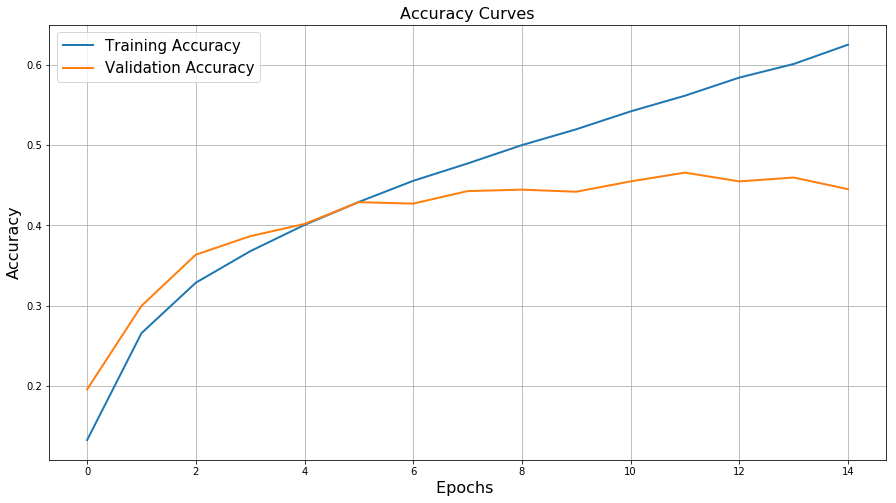

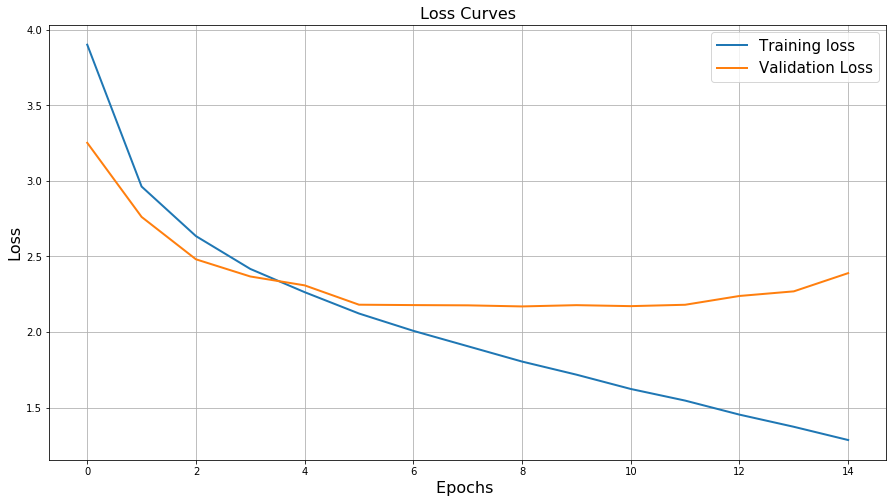

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['acc'],linewidth=2.0)
plt.plot(hist.history['val_acc'],linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


plt.figure(figsize=[15,8])
plt.grid()
plt.plot(hist.history['loss'],linewidth=2.0)
plt.plot(hist.history['val_loss'],linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

plt.show()

Imagenet nos da un mejor ajuste de pesos iniciales para la estructura de la red, lo cual permite a VGG generar los mejores resultados hasta el momento, llegando a un accuracy máximo del 44%. Esto demuestra que transferir el conocimiento de un modelo a otro es útil si se realiza inteligentemente, ya que en este caso se transfiere modificando las ultimas 4 capas de VGG y se ajustan al nuevo modelo, lográndose así un 45% de accuracy, lo cual es el mejor accuracy hasta el momento.

Para este modelo, el tiempo de entrenamiento fue de 15 minutos, siendo el mayor de todos los demás. Teorizamos que esto se debe a que las capas de BatchNormalization, dropout y VGG producen un gran estrés en la GPU ya que en las pruebas, cada vez que agregábamos estas capas, el tiempo de entrenamiento crecía considerablemente.

¿Por que no se llega a mejores resultados?

Imagenet es una gran base de datos de imágenes también grandes, donde mas grande significa mas detalles y un mejor entrenamiento, por lo cual un mejor resultado. La data de Cifar 100 son imagenes pequeñas donde algunas de ellas, sin contexto, no se pueden distinguir, aviones pareces aves, sombras con formas de animales, etc, por lo cual, afinar los pesos en base a un gran dataset no necesariamente nos sirve para el caso de cifar 100, por el echo de que las dimensiones de las imágenes son distintas, por lo cual, se tienen menos detalles y se genera menos información en la red